# Visualizing Errors

## Basic Errorbars

A basic errorbar can be created with a single Matplotlib function call:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

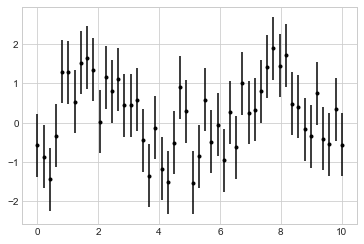

In [12]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

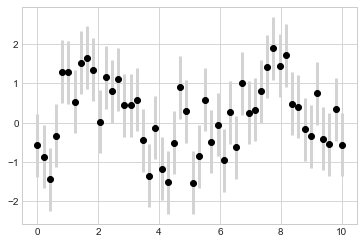

In [14]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black', 
            ecolor='lightgray', elinewidth=3, capsize=0);

## Continuous Errors

In some situations it is desirable to show errorbars on continuous quantities. Though Matplotlib does not have a built-in convenience routine for this type of application, it's relatively easy to combine primitives like `plt.plot` and `plt.fill_between` for a useful result.

Here we'll perform a simple Gaussian process regression, using the Scikit-Learn API. This is a method of fitting a very flexible non-parametric function to data with a continuous measure of the uncertainty. We won't delve into the details of Gaussian process regression at this point, but will focus instead on how we might visualize such a continuous error measurement:

In [17]:
from sklearn.gaussian_process import GaussianProcess

# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Compute the Gaussian process fit
gp = GaussianProcess(corr='cubic', theta0=1e-2, thetaL=1e-4, thetaU=1E-1,
                     random_start=100)
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, MSE = gp.predict(xfit[:, np.newaxis], eval_MSE=True)
dyfit = 2 * np.sqrt(MSE)  # 2*sigma ~ 95% confidence region

Now we have `xfit`, `yfit`, and `dyfit`, which sample the continuous fit to our data. We could pass these to the `plt.errorbar` function as above, but we don't really want to plot 1000 points with 1000 errorbars. Instead, we can use the `plt.fill_between` function with a ligth color to visualize this continous error:

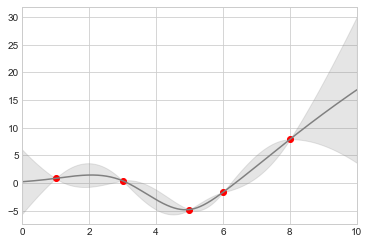

In [23]:
# Visualize the result
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2)

plt.xlim(0, 10);

Note what we've done here with the `fill_between` function: we pass an x value, then the lower y-bound, then the upper y-bound, and the result is that the area between these regions is filled.